# Recommendation Chatbot API: Evaluation llama2 vs llama3

In [1]:
%%capture output
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

BASE_PATH         = '../..'
API_PATH          = f'{BASE_PATH}/chat-bot-api'
LIB_PATH          = f'{BASE_PATH}/lib'
METRICS_PATH      = f'{BASE_PATH}/metrics'

sys.path.append(LIB_PATH)
sys.path.append(API_PATH)

In [3]:
import logging
import os
import pytorch_common.util as pu
import util as ut
from client import RecChatBotV1ApiClient
from models import EvaluationState, SessionsPlotter
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

## Setup

In [4]:
def on_file(file_path, format='%(asctime)s - %(levelname)s - %(message)s'):
    handler = logging.FileHandler(file_path)
    handler.setFormatter(logging.Formatter(format))
    return handler


pu.LoggerBuilder() \
    .handler(on_file('./evaluation.log'))\
    .on_console() \
    .build()

<RootLogger root (INFO)>

In [5]:
api_item_ids = [int(item["id"]) for item in RecChatBotV1ApiClient().items(all=True)]

2024-05-24 16:58:35,058 - INFO - GET http://nonosoft.ddns.net:8080/api/v1/items?email=&seen=True&content=&all=True&limit=5&hide_emb=True&release=1950&genres=


In [6]:
llama3_sessions = EvaluationState.load(f'{METRICS_PATH}/evaluation-metrics-llama3.dt').sessions

llama3_plotter = SessionsPlotter(llama3_sessions)

eval_state_with_llama2 = EvaluationState.load(f'{METRICS_PATH}/evaluation-metrics-llama2.dt')
llama2_plotter = SessionsPlotter(eval_state_with_llama2.sessions)

In [7]:
logging.info('')
logging.info('With Llama3:')
logging.info('')
llama3_plotter.metrics(api_item_ids)
logging.info('')
logging.info('With Llama2:')
logging.info('')
llama2_plotter.metrics(api_item_ids)

2024-05-24 16:58:36,727 - INFO - 
2024-05-24 16:58:36,728 - INFO - With Llama3:
2024-05-24 16:58:36,728 - INFO - 
2024-05-24 16:58:36,728 - INFO - User Sessions - Count: 135
2024-05-24 16:58:36,729 - INFO - User Sessions - Steps Count: 1907
2024-05-24 16:58:36,743 - INFO - User Sessions - NDCG: 0.97
2024-05-24 16:58:36,746 - INFO - User Sessions - Mean Average Precision: 0.53
2024-05-24 16:58:36,749 - INFO - User Sessions - Mean Reciprocal Rank: 0.92
2024-05-24 16:58:36,754 - INFO - User Sessions - Recall: 0.58
2024-05-24 16:58:36,757 - INFO - Catalog Coverage: 0.18
2024-05-24 16:58:36,757 - INFO - 
2024-05-24 16:58:36,758 - INFO - With Llama2:
2024-05-24 16:58:36,758 - INFO - 
2024-05-24 16:58:36,758 - INFO - User Sessions - Count: 150
2024-05-24 16:58:36,759 - INFO - User Sessions - Steps Count: 1586
2024-05-24 16:58:36,769 - INFO - User Sessions - NDCG: 0.97
2024-05-24 16:58:36,772 - INFO - User Sessions - Mean Average Precision: 0.5
2024-05-24 16:58:36,774 - INFO - User Sessions - 

**Step 1**

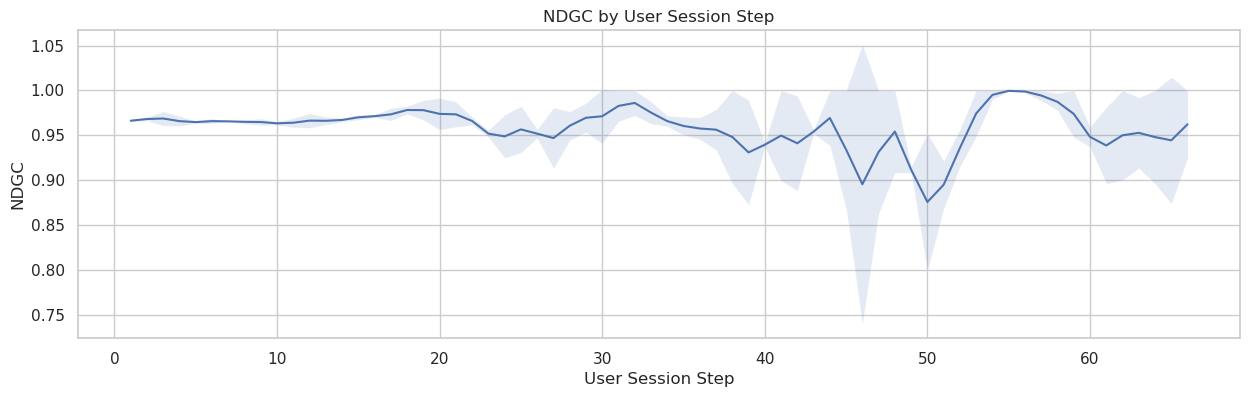

In [8]:
llama2_plotter.plot_mean_ndcg_evolution(figsize=(15, 4))

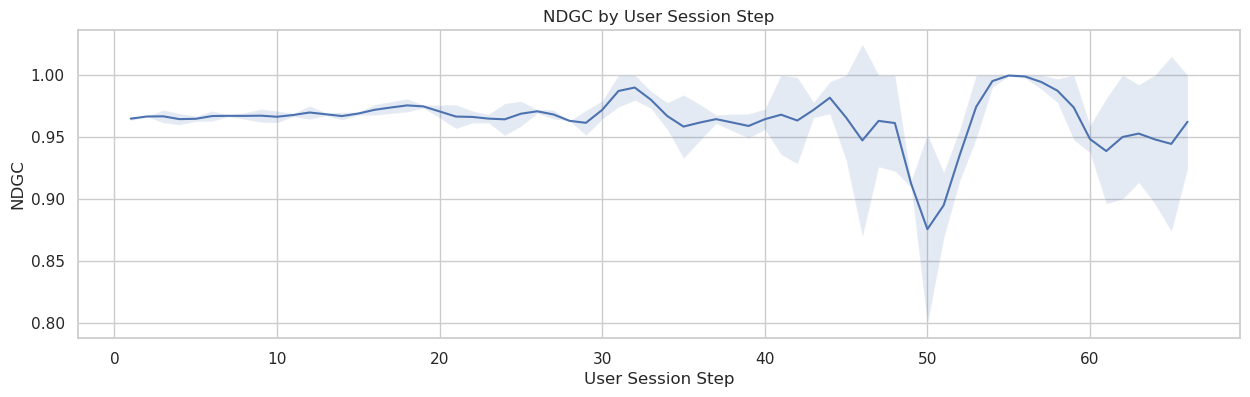

In [9]:
llama3_plotter.plot_mean_ndcg_evolution(figsize=(15, 4))